  Using cached tensorflow-2.13.1-cp38-cp38-win_amd64.whl (1.9 kB)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 7)                 322       
                                                                 
 dense_10 (Dense)            (None, 7)                 56        
                                                                 
 dense_11 (Dense)            (None, 1)                 8         
                                                                 
Total params: 386 (1.51 KB)
Trainable params: 386 (1.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/150
2/2 [==============================] - 0s 6ms/step - loss: 0.6932 - acc: 0.4845 - mse: 0.2500 - getRecall: 0.5154 - getPrecision: 0.5093
Epoch 2/150
2/2 [==============================] - 0s 4ms/step - los

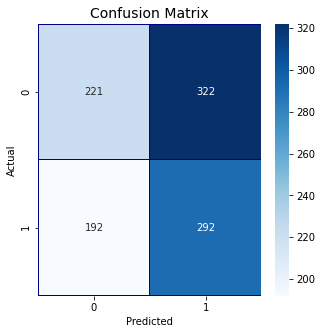

33/33 [==============================] - 0s 724us/step


0.4956927385355311

In [15]:
#個別模型準確率:Artificial neural network
!pip install --upgrade tensorflow
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


np.random.seed(0)
tf.random.set_seed(100)
#讀取資料和資料處理
#讀取資料
bank=pd.read_csv("2886final.csv")
bank = bank.drop(['Instrument','Date','Quarter'],axis=1)
bank['ROI%'] = bank['ROI%'].shift(-1)

# 提取特徵欄位名稱
feature_names = bank.drop(['ROI%'], axis=1).columns.tolist()

X = bank.drop(['ROI%'],axis=1)
X=pd.DataFrame(X)
X.drop(index=X.index[-1],axis=0,inplace=True)

#資料標準化
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X=pd.DataFrame(X,columns=feature_names)
static=X.describe()
#X.info()
#a=pd.DataFrame(X.corr())



predict=[]
for i in bank['ROI%']:
    if i>0:
        predict.append(1)
    else:
        False
        predict.append(0)

bank['ROI%']=predict
y=bank['ROI%']
y.drop(index=y.index[-1],axis=0,inplace=True)




#資料切割
#資料切割(2020/1/2前為疫情前，後為疫情後)
split_index=2452
X_train=X.iloc[:split_index]
X_test=X.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]



classifier=Sequential()

classifier.add(Dense(units=7,kernel_initializer='uniform',activation='relu',input_dim=45))
classifier.add(Dense(units=7,kernel_initializer='uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

import keras.backend as K
def getRecall(y_true,y_pred):
    true_positives=K.sum(K.round(K.clip(y_true*y_pred,0,1)))
    possible_positives=K.sum(K.round(K.clip(y_true,0,1)))
    recall=true_positives/(possible_positives+K.epsilon())
    return recall

def getPrecision(y_true,y_pred):
    true_positives=K.sum(K.round(K.clip(y_true*y_pred,0,1)))
    predicted_positives=K.sum(K.round(K.clip(y_pred,0,1)))
    precision=true_positives/(predicted_positives+K.epsilon())
    return precision

classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc','mse',getRecall,getPrecision])
print(classifier.summary())

import time
start_time = time.time()  
classifier.fit(X_train,y_train,batch_size=1500,epochs=150)
end_time = time.time()
elapsed_time = end_time - start_time
print('類神經網路運算時間:', elapsed_time, '秒')

scores_train=classifier.evaluate(X_train,y_train)
scores_test=classifier.evaluate(X_test,y_test)
print('訓練集準確率:',scores_train[1])
print('測試集準確率:',scores_test[1])



y_pred_proba = classifier.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)
y_pred = np.reshape(y_pred, (-1))



from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

cm=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
fig,(ax1)=plt.subplots(ncols=1,figsize=(5,5))
sns.heatmap(cm,
           xticklabels=['0','1'],
           yticklabels=['0','1'],
           annot=True, fmt='g',ax=ax1,
           linewidths=.2,linecolor='Darkblue',cmap='Blues'
           )
print('混淆矩陣:\n',confusion_matrix(y_test, y_pred))
plt.title('Confusion Matrix',fontsize=14)
plt.show()

from sklearn.metrics import confusion_matrix,roc_curve,auc

y_pred_proba=classifier.predict(X_test)
[fpr,tpr,thr]=roc_curve(y_test,y_pred_proba)
idx=np.min(np.where(tpr>0.95))

idx2=np.min(np.where(tpr>0.90))

auc(fpr,tpr)



In [24]:
#讀取資料和資料處理
data = pd.read_csv('2886final.csv')
data['ROI%'] = data['ROI%'].shift(-1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


columns = [
    'Price Open', 'Price High', 'Price Low', 'Price Close', 'Volume(1000shares)', 
    'turnover(1000)', 'sma5', 'sma10', 'sma20', 'k', 'd', 'bias5', 'bias10', 
    'bias20', 'rsi', 'w%r', 'mtm', 'macd', 'macd_signal', 'macdhist', 'ar', 'br', 
    'dmi', 'MV%', 'Market Capital', 'P/E', 'P/B', 'Long PSTN VAL', 
    'Short PSTN VAL', 'Qfii Net S/B M.Cap', 'Fund Net S/B M.Cap', 'Dealer Net S/B M.Cap', 
    'Quarter', 'Liabilities Ratio', 'ROA-Comprehensive Income', 'ROE-Comprehensive Income', 
    'Net Income Ratio', 'Return on Total Assets Growth Rate - YOY', 'Recurring EPS', 
    'P/E Ratio at Quarter-End', 'Cash Dividend Yield', 'Dividend Yield', 'Capital Adequacy Ratio', 
    'Loans to Deposit Ratio', 'Liquidity Ratio', 'Leverage ratio'
]

encoded_data = {col: le.fit_transform(data[col]) for col in columns}
X = pd.DataFrame(encoded_data)
X.drop(X.index[-1], axis=0, inplace=True)
predict=[]
for i in data['ROI%']:
    if i>0:
        predict.append(1)
    else:
        False
        predict.append(0)

data['RR']=predict
y=data['RR']
y.drop(index=y.index[-1],axis=0,inplace=True)
counts = y.value_counts()

# 計算百分比
percentages = y.value_counts(normalize=True) * 100

# 輸出結果
print("各類別個數:")
print(counts)
print("\n各類別百分比:")
print(percentages)

各類別個數:
RR
0    1871
1    1608
Name: count, dtype: int64

各類別百分比:
RR
0    53.779822
1    46.220178
Name: proportion, dtype: float64


C:\Users\anson\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best params: {'model__learning_rate': 0.1, 'model__max_depth': 4, 'model__min_child_weight': 15, 'model__n_estimators': 10, 'selector__k': 19}
Selected Features: Index(['Volume(1000shares)', 'turnover(1000)', 'k', 'd', 'bias5', 'bias10',
       'bias20', 'rsi', 'w%r', 'mtm', 'macd', 'macdhist', 'ar', 'br',
       'Qfii Net S/B M.Cap', 'Return on Total Assets Growth Rate - YOY',
       'Cash Dividend Yield', 'Dividend Yield', 'Capital Adequacy Ratio'],
      dtype='object')
XG Boost運算時間: 0.06818079948425293 秒
Accuracy: 51.12%
              precision    recall  f1-score   support

           0     0.5232    0.8527    0.6485       543
           1     0.4366    0.1281    0.1981       484

    accuracy                         0.5112      1027
   macro avg     0.4799    0.4904    0.4233      1027
weighted avg     0.4824    0.5112    0.4362      1027

                   pre       rec       spe        f1       geo       iba       sup

          0       0.52      0.85      0.13      0.65      

0.4952228208757591

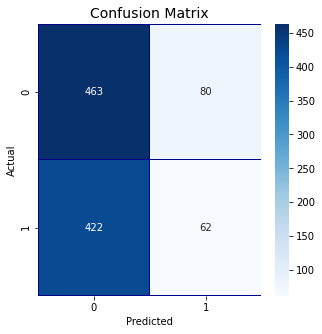

In [5]:
import pandas as pd
!pip install imbalanced-learn
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

#讀取資料
bank=pd.read_csv("2886final.csv")
bank = bank.drop(['Instrument','Date','Quarter'],axis=1)
bank['ROI%'] = bank['ROI%'].shift(-1)

# 提取特徵欄位名稱
feature_names = bank.drop(['ROI%'], axis=1).columns.tolist()

X = bank.drop(['ROI%'],axis=1)
X=pd.DataFrame(X)
X.drop(index=X.index[-1],axis=0,inplace=True)

#資料標準化
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X=pd.DataFrame(X,columns=feature_names)
static=X.describe()
#X.info()
#a=pd.DataFrame(X.corr())



predict=[]
for i in bank['ROI%']:
    if i>0:
        predict.append(1)
    else:
        False
        predict.append(0)

bank['ROI%']=predict
y=bank['ROI%']
y.drop(index=y.index[-1],axis=0,inplace=True)

#資料切割(2020/1/2前為疫情前，後為疫情後)
split_index=2452
X_train=X.iloc[:split_index]
X_test=X.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]

#特徵選取
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np
pipeline = Pipeline([('selector',SelectKBest(f_regression)),('model',XGBClassifier(random_state = 100))])

param_grid = {
    'selector__k': [15, 16, 17, 18, 19, 20, 21],
    'model__max_depth': range(2,10,2),  
    'model__min_child_weight':range(5,21,5),
    'model__n_estimators':range(10, 200, 20),
    'model__learning_rate':[0.001,0.01,0.1]
    
}
search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    n_jobs=-1,
    scoring="accuracy",
    cv=5,
    verbose=0
)
search.fit(X,y)

# 獲取最佳特徵選擇器
best_selector = search.best_estimator_['selector']

# 獲取選擇的特徵索引
selected_features_indices = best_selector.get_support(indices=True)
selected_features = X.columns[selected_features_indices]
print('Best params:',search.best_params_)
print("Selected Features:", selected_features)


X_train_selected = X_train.iloc[:, selected_features_indices]
X_test_selected = X_test.iloc[:, selected_features_indices]

# 創建並訓練新的模型
model = XGBClassifier(random_state=100,
                      max_depth=search.best_params_['model__max_depth'],
                      min_child_weight=search.best_params_['model__min_child_weight'],
                      n_estimators=search.best_params_[ 'model__n_estimators'],
                      learning_rate=search.best_params_['model__learning_rate']
                     )
#計算時間
import time
start_time = time.time()
model.fit(X_train_selected, y_train)
end_time = time.time()
elapsed_time = end_time - start_time

print('XG Boost運算時間:', elapsed_time, '秒')


# 在測試集上進行預測
y_pred = model.predict(X_test_selected)

# 評估模型
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", f'{accuracy*100:.2f}%')


#效能衡量指標
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,digits=4))

from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test,y_pred))

#混淆矩陣
from sklearn.metrics import confusion_matrix,roc_curve,auc
y_pred=model.predict(X_test_selected)
cm=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
fig,(ax1)=plt.subplots(ncols=1,figsize=(5,5))
sns.heatmap(cm,
           xticklabels=['0','1'],
           yticklabels=['0','1'],
           annot=True, fmt='g',ax=ax1,
           linewidths=.2,linecolor='Darkblue',cmap='Blues'
           )
print('混淆矩陣:\n',confusion_matrix(y_test, y_pred))
plt.title('Confusion Matrix',fontsize=14)

#計算 AUC（曲線下面積）
y_pred_proba=model.predict_proba(X_test_selected)[:,1]
[fpr,tpr,thr]=roc_curve(y_test,y_pred_proba)
idx=np.min(np.where(tpr>0.95))

idx2=np.min(np.where(tpr>0.90))

auc(fpr,tpr)

Best params: {'model__learning_rate': 0.1, 'model__n_estimators': 50, 'selector__k': 19}
Selected Features: Index(['Volume(1000shares)', 'turnover(1000)', 'k', 'd', 'bias5', 'bias10',
       'bias20', 'rsi', 'w%r', 'mtm', 'macd', 'macdhist', 'ar', 'br',
       'Qfii Net S/B M.Cap', 'Return on Total Assets Growth Rate - YOY',
       'Cash Dividend Yield', 'Dividend Yield', 'Capital Adequacy Ratio'],
      dtype='object')
AdaBoost運算時間: 0.5681498050689697 秒
Accuracy: 49.95%
              precision    recall  f1-score   support

           0     0.5174    0.7956    0.6270       543
           1     0.4219    0.1674    0.2396       484

    accuracy                         0.4995      1027
   macro avg     0.4696    0.4815    0.4333      1027
weighted avg     0.4724    0.4995    0.4444      1027

                   pre       rec       spe        f1       geo       iba       sup

          0       0.52      0.80      0.17      0.63      0.36      0.14       543
          1       0.42      0.

0.49808608434926865

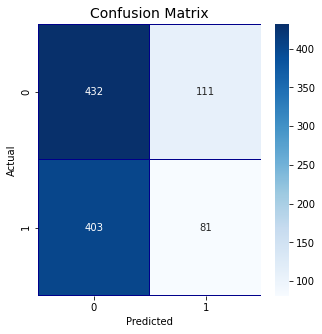

In [11]:
import pandas as pd
!pip install imbalanced-learn
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

#讀取資料
bank=pd.read_csv("2886final.csv")
bank = bank.drop(['Instrument','Date','Quarter'],axis=1)
bank['ROI%'] = bank['ROI%'].shift(-1)

# 提取特徵欄位名稱
feature_names = bank.drop(['ROI%'], axis=1).columns.tolist()

X = bank.drop(['ROI%'],axis=1)
X=pd.DataFrame(X)
X.drop(index=X.index[-1],axis=0,inplace=True)

#資料標準化
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X=pd.DataFrame(X,columns=feature_names)
static=X.describe()
#X.info()
#a=pd.DataFrame(X.corr())



predict=[]
for i in bank['ROI%']:
    if i>0:
        predict.append(1)
    else:
        False
        predict.append(0)

bank['ROI%']=predict
y=bank['ROI%']
y.drop(index=y.index[-1],axis=0,inplace=True)

#資料切割(2020/1/2前為疫情前，後為疫情後)
split_index=2452
X_train=X.iloc[:split_index]
X_test=X.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]

#特徵選取
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np
pipeline = Pipeline([('selector',SelectKBest(f_regression)),('model',AdaBoostClassifier(random_state = 100))])

param_grid = {
    'selector__k': [15, 16, 17, 18, 19, 20, 21], 
    'model__n_estimators':range(50, 250,50),
    'model__learning_rate':[0.001,0.01,0.1]
    
}
search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    n_jobs=-1,
    scoring="accuracy",
    cv=5,
    verbose=0
)
search.fit(X,y)

# 獲取最佳特徵選擇器
best_selector = search.best_estimator_['selector']

# 獲取選擇的特徵索引
selected_features_indices = best_selector.get_support(indices=True)
selected_features = X.columns[selected_features_indices]
print('Best params:',search.best_params_)
print("Selected Features:", selected_features)


X_train_selected = X_train.iloc[:, selected_features_indices]
X_test_selected = X_test.iloc[:, selected_features_indices]

# 創建並訓練新的模型
model = AdaBoostClassifier(random_state=100,
                      n_estimators=search.best_params_[ 'model__n_estimators'],
                      learning_rate=search.best_params_['model__learning_rate']
                     )
#計算時間
import time
start_time = time.time()
model.fit(X_train_selected, y_train)
end_time = time.time()
elapsed_time = end_time - start_time

print('AdaBoost運算時間:', elapsed_time, '秒')


# 在測試集上進行預測
y_pred = model.predict(X_test_selected)

# 評估模型
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", f'{accuracy*100:.2f}%')


#效能衡量指標
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,digits=4))

from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test,y_pred))

#混淆矩陣
from sklearn.metrics import confusion_matrix,roc_curve,auc
y_pred=model.predict(X_test_selected)
cm=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
fig,(ax1)=plt.subplots(ncols=1,figsize=(5,5))
sns.heatmap(cm,
           xticklabels=['0','1'],
           yticklabels=['0','1'],
           annot=True, fmt='g',ax=ax1,
           linewidths=.2,linecolor='Darkblue',cmap='Blues'
           )
print('混淆矩陣:\n',confusion_matrix(y_test, y_pred))
plt.title('Confusion Matrix',fontsize=14)

#計算 AUC（曲線下面積）
y_pred_proba=model.predict_proba(X_test_selected)[:,1]
[fpr,tpr,thr]=roc_curve(y_test,y_pred_proba)
idx=np.min(np.where(tpr>0.95))

idx2=np.min(np.where(tpr>0.90))

auc(fpr,tpr)
